In [12]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from collections import defaultdict

In [36]:
parabolas = pd.read_csv("../supplementary_data/parabola_coeffs.csv", index_col=0)
all_ox_quadratics = defaultdict()
all_red_quadratics = defaultdict()

for oxide in parabolas.index:
    if oxide[-1]=="O":
        all_ox_quadratics[oxide[:-1]+"2"] = (parabolas.loc[oxide][" oxidising a1"], parabolas.loc[oxide][" oxidising a2"])
        all_red_quadratics[oxide[:-1]+"2"] = (parabolas.loc[oxide][" reducing a1"], parabolas.loc[oxide][" reducing a2"])
    elif oxide[-1]=="3":
        all_ox_quadratics[oxide[:-3]+"3"] = (parabolas.loc[oxide][" oxidising a1"], parabolas.loc[oxide][" oxidising a2"])
        all_red_quadratics[oxide[:-3]+"3"] = (parabolas.loc[oxide][" reducing a1"], parabolas.loc[oxide][" reducing a2"])
    
    elif oxide[-1]=="2":
        all_ox_quadratics[oxide[:-2]+"4"] = (parabolas.loc[oxide][" oxidising a1"], parabolas.loc[oxide][" oxidising a2"])
        all_red_quadratics[oxide[:-2]+"4"] = (parabolas.loc[oxide][" reducing a1"], parabolas.loc[oxide][" reducing a2"])

all_oxides = pickle.load(open("../data_gather/unary_oxide_data.p", "rb"))

def format_saved_excel(starting_df):
    # drop last two columns
    starting_df = starting_df.iloc[: , :-2]
    # rename cols
    starting_df.columns = ["ele", "mp-id", "ene"]
    return starting_df
    
reference_ox2 = ref_oxides[~(ref_oxides.oxide.str.contains("2O3")) & ~(ref_oxides.oxide.str.contains("O2"))]
reference_ox2.columns = ["ele", "mp-id", "ene"]
reference_ox3 = ref_oxides[ref_oxides.oxide.str.contains("2O3")]
reference_ox3.columns = ["ele", "mp-id", "ene"]
reference_ox4 = ref_oxides[ref_oxides.oxide.str.contains("O2")]
reference_ox4.columns = ["ele", "mp-id", "ene"]



In [37]:
elements =  [ "Si", "Al", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Nb", "Mo", 
             "Li", "Be", "Na", "Mg", "K", "Ca", "Rb", "Sr", "Cs", "Ba", 
            "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn",
            "Ga", "Ge", "As", "Se", "Br",
            "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd",
            "In", "Sn", "Sb", "Te", "I",
            "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", 
            "Tl", "Pb", "Bi",
           "La", "Ce", "Nd", "Pr", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu"]

def f(x: np.ndarray, coef_1: float, coef_2: float):
    # plot y values given quadratic coefs
    return coef_1*(x)**2 + coef_2*x

def plot_phase_diag(element):
    for formation_energy, structure in zip(all_oxides[element]["formation_energies"], all_oxides[element]["structures"]):
        composition = structure.composition
        num_o = composition["O"]
        num_ele = composition[element]
        # calculate assumed oxidation state
        assumed_ox = 2*num_o/num_ele
        plt.plot(0, 0, ".", color="b")
        plt.plot(8, 0, ".", color="b")
        plt.plot([0, 8], [0, 0], "k--", lw=1, alpha=0.1)
        plt.plot(assumed_ox, formation_energy, "o", color="b", alpha=0.5)
    # duplicate a plot of last datapoint and add label 
    plt.plot(assumed_ox, formation_energy, "o", color="b", alpha=0.5, label="MP-data")



ox2oxide = {
    2: "O",
    3: "2O3",
    4: "O2"
}

def plot_curves(oxidation_state: int, element: str, reference_energy: float):
    ox = all_ox_quadratics[f"{element}{oxidation_state}"]
    red = all_red_quadratics[f"{element}{oxidation_state}"]
    ox_x = np.linspace(0, 8-oxidation_state, 50)
    red_x = np.linspace(0, oxidation_state, 50)
    red_y = f(red_x, red[0], red[1])
    ox_y = f(ox_x, ox[0], ox[1])
    plt.plot(ox_x+oxidation_state, ox_y+reference_energy, label=r"$f_{ox.}$"+f"{element}{ox2oxide[oxidation_state]}",)
    plt.plot(-red_x+oxidation_state, red_y+reference_energy, label=r"$f_{red.}$"+f"{element}{ox2oxide[oxidation_state]}")


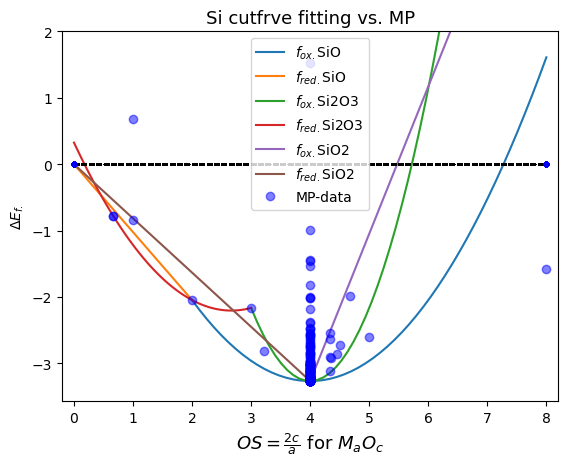

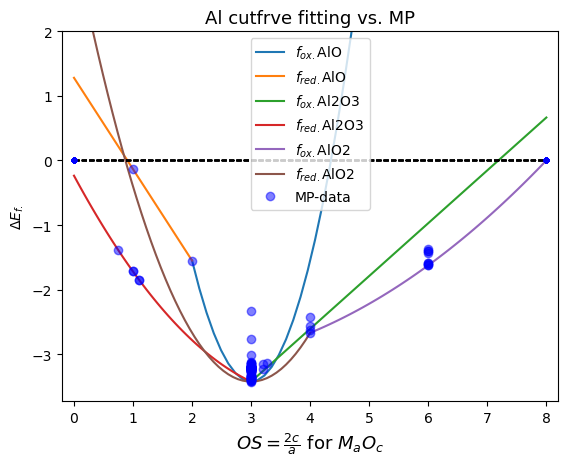

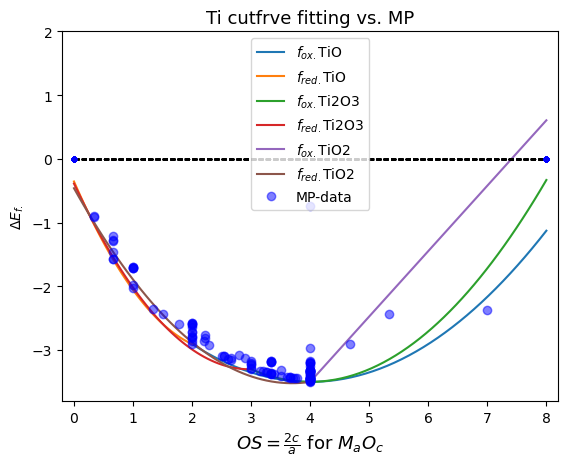

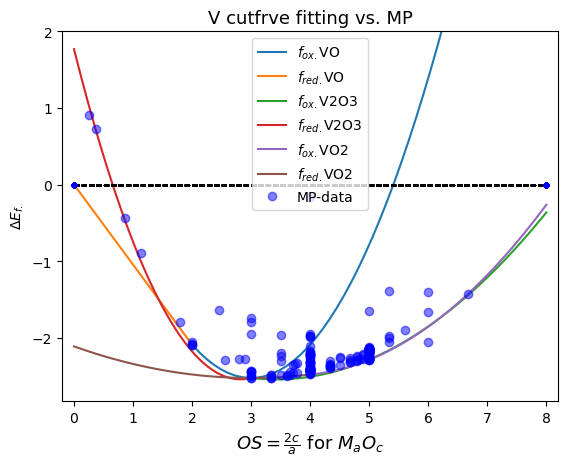

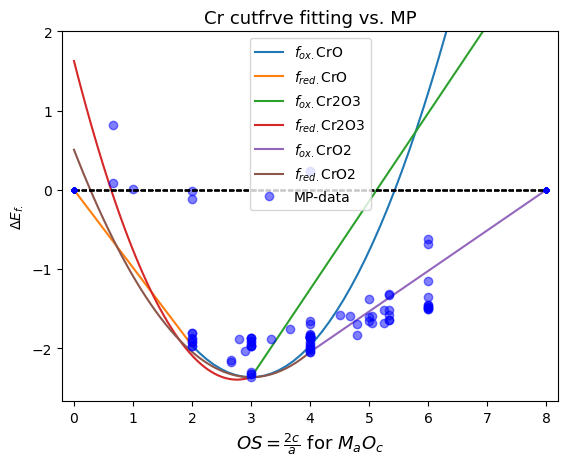

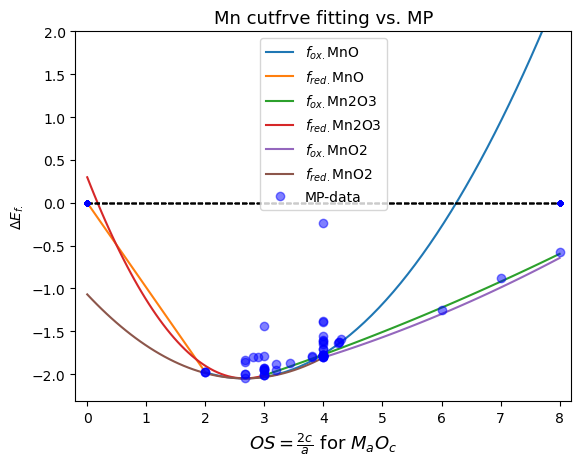

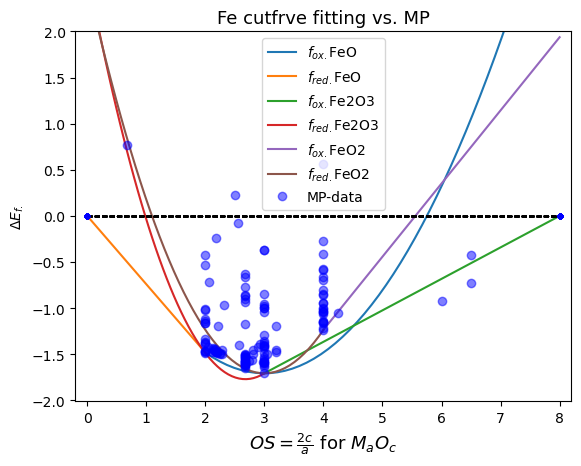

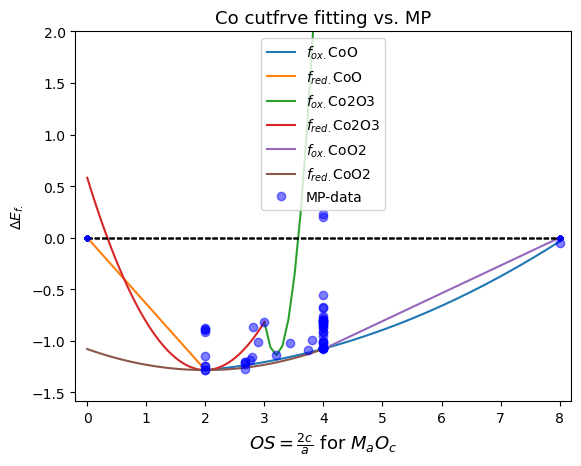

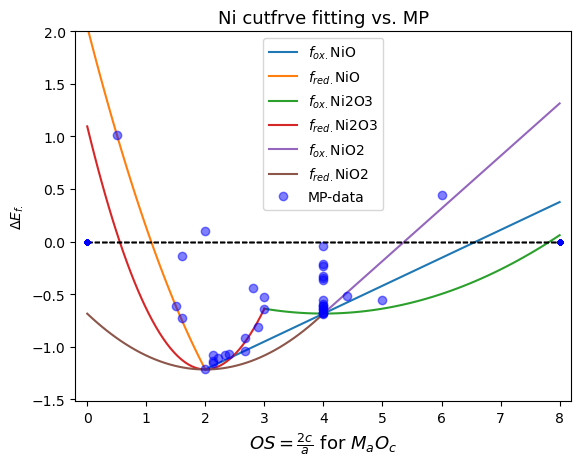

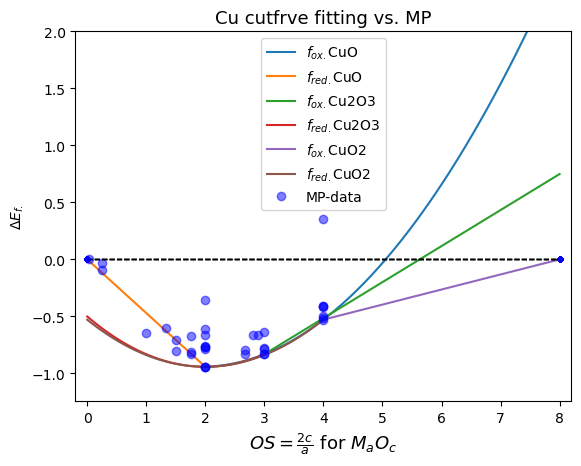

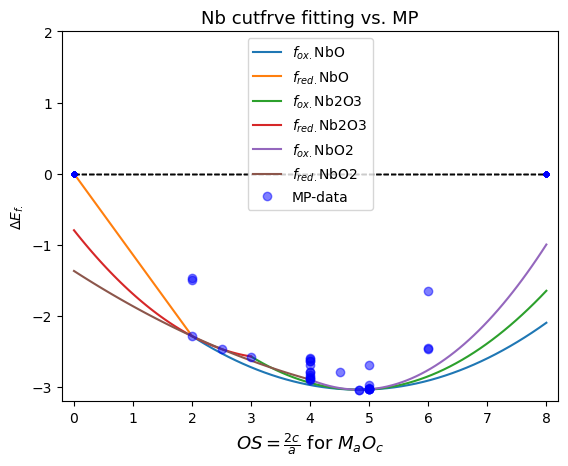

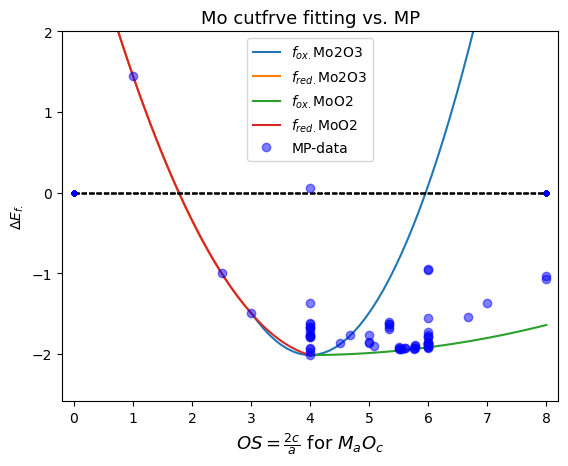

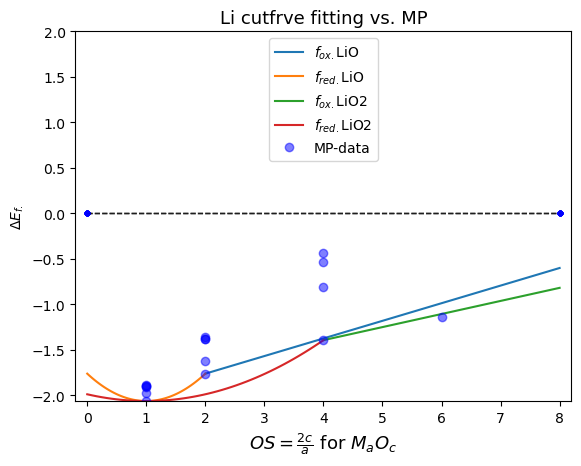

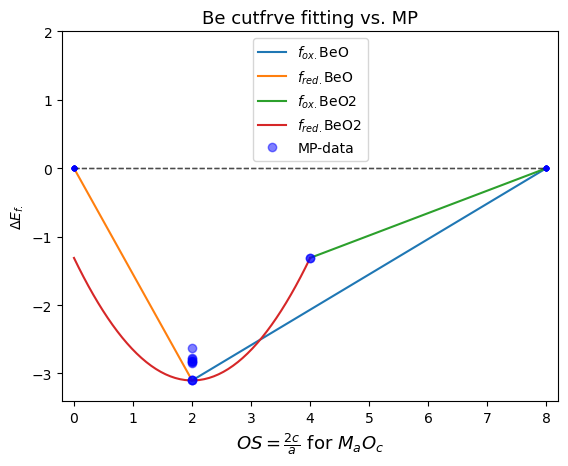

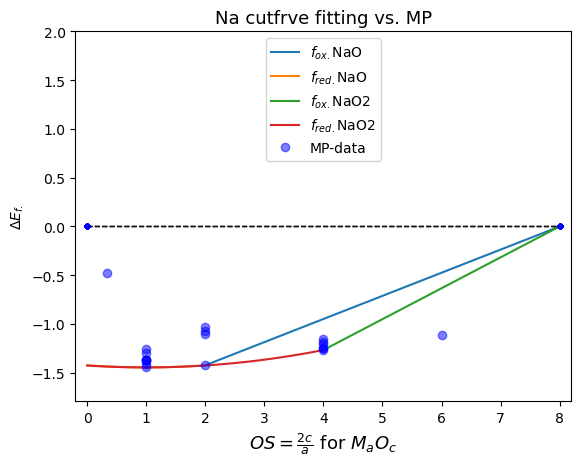

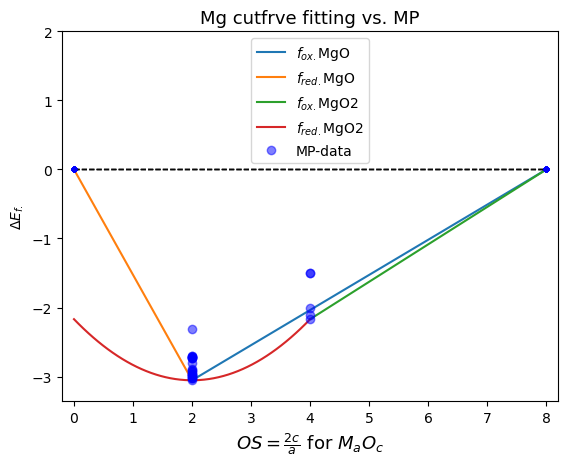

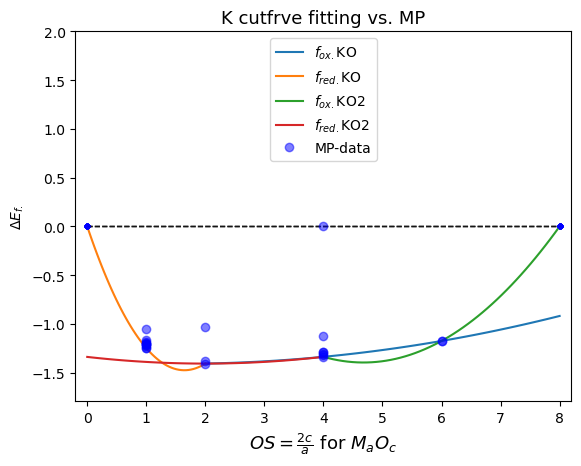

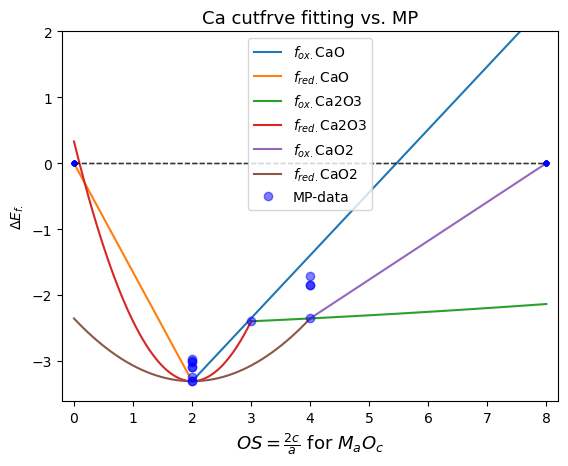

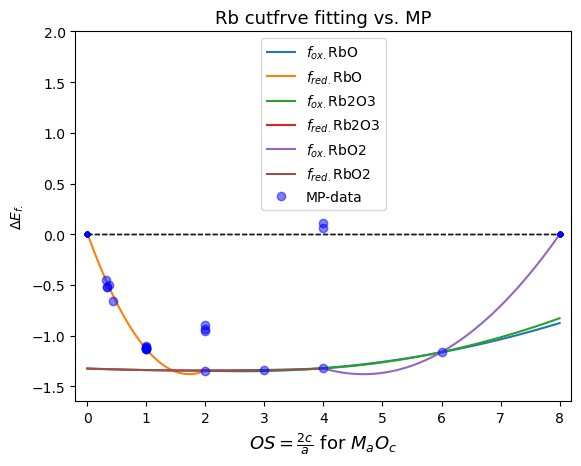

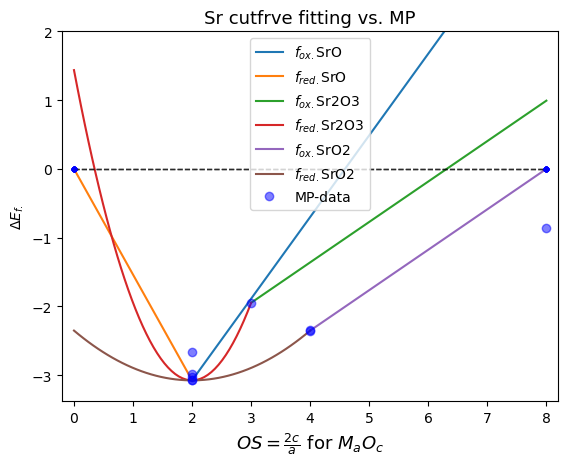

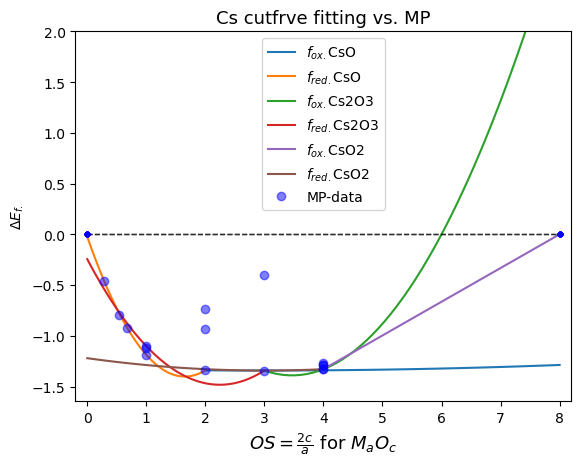

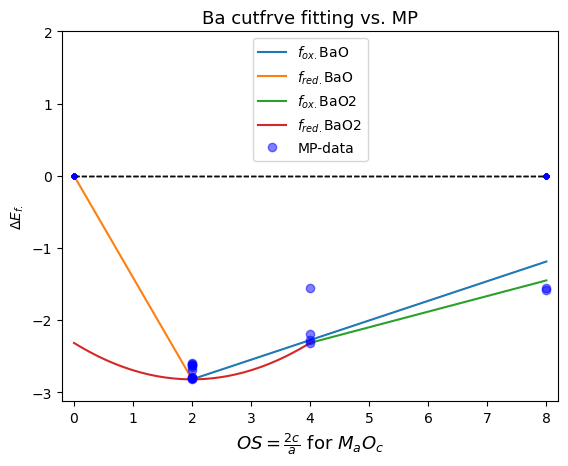

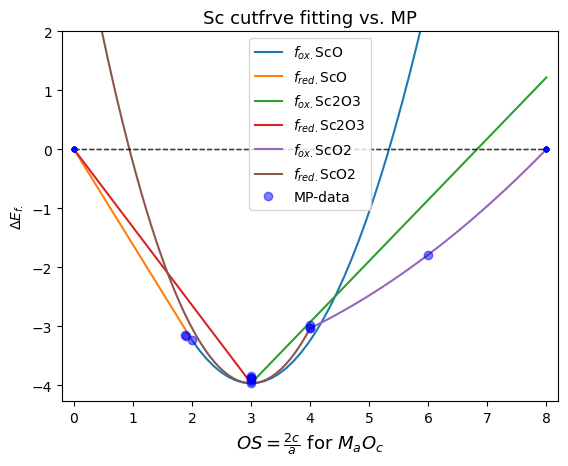

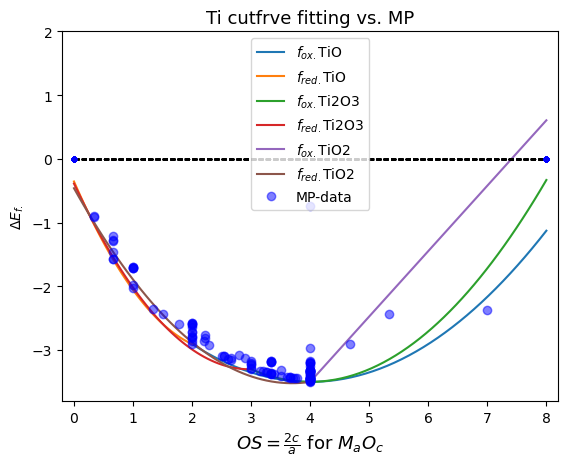

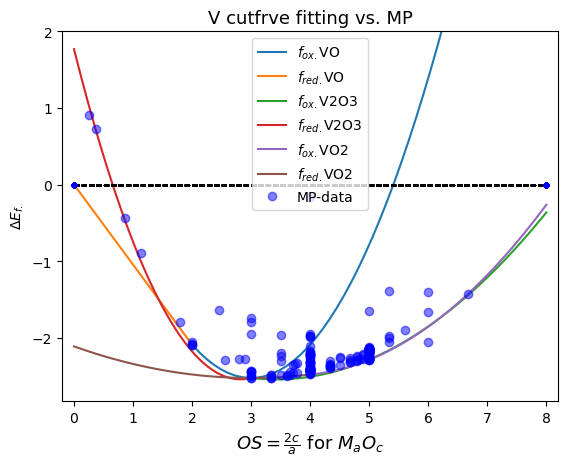

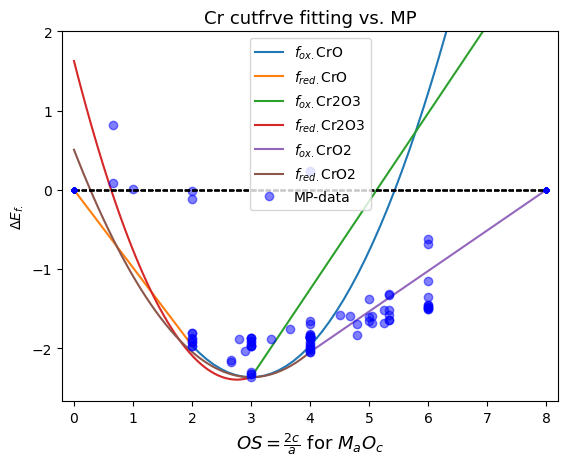

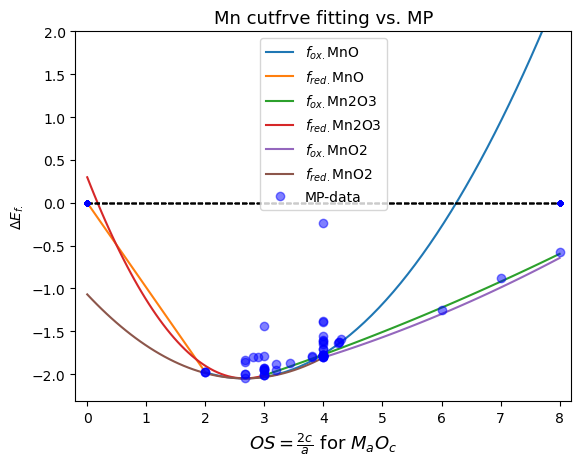

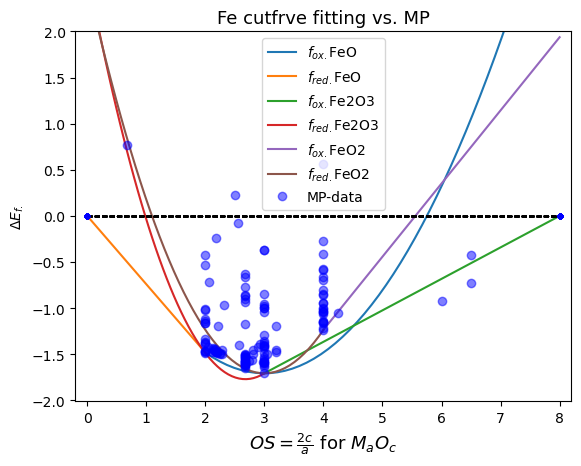

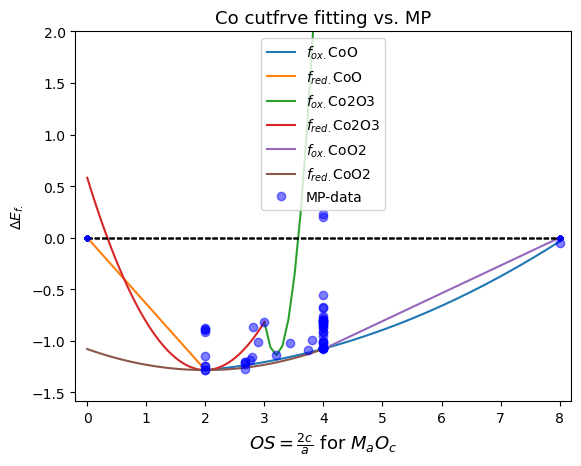

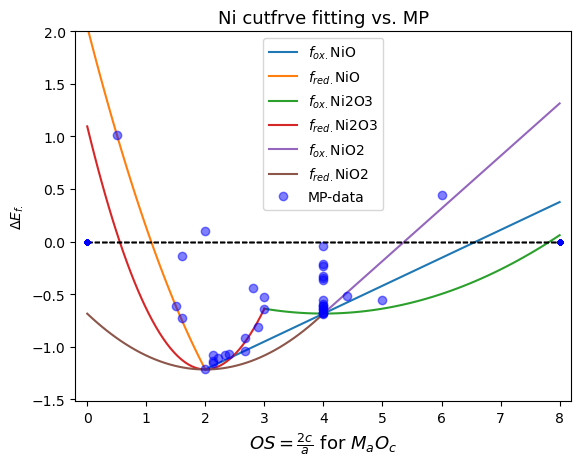

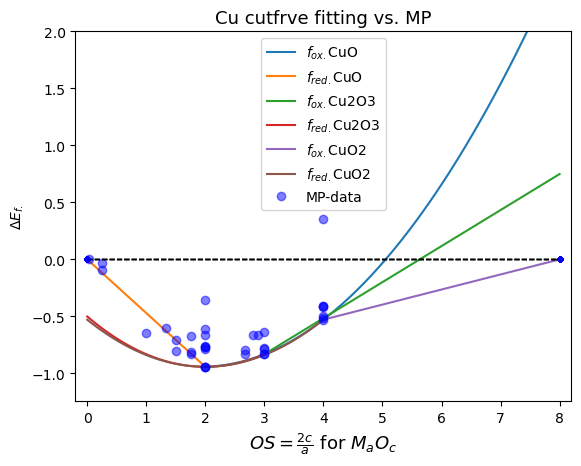

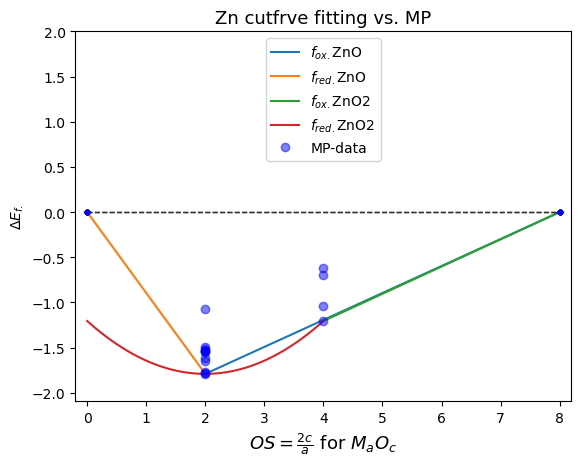

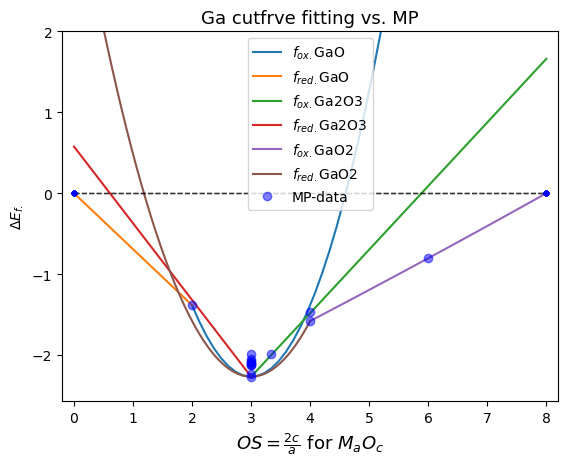

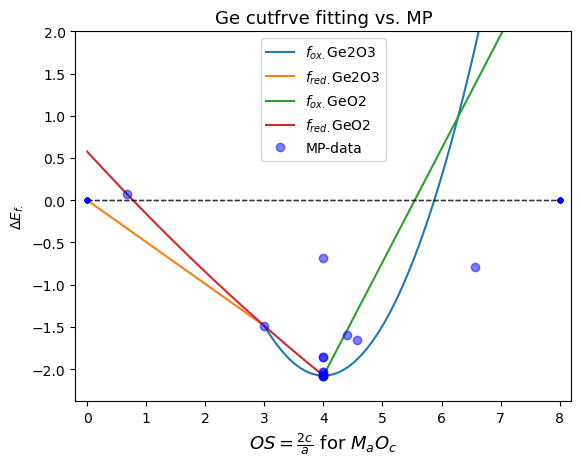

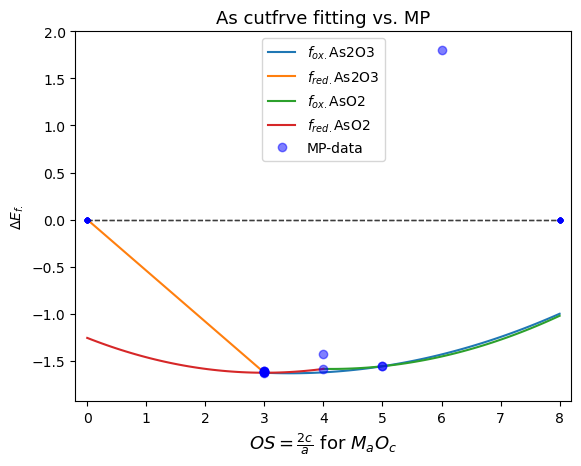

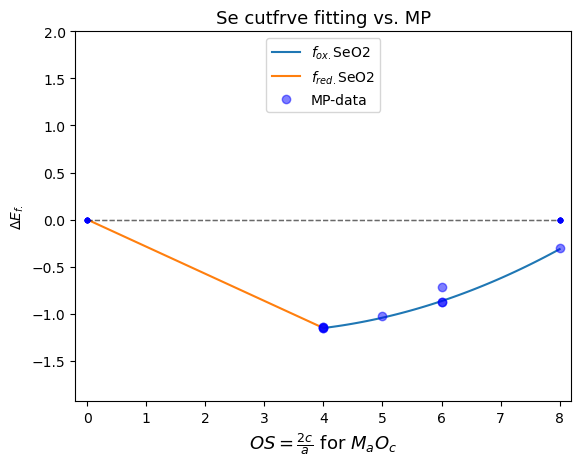

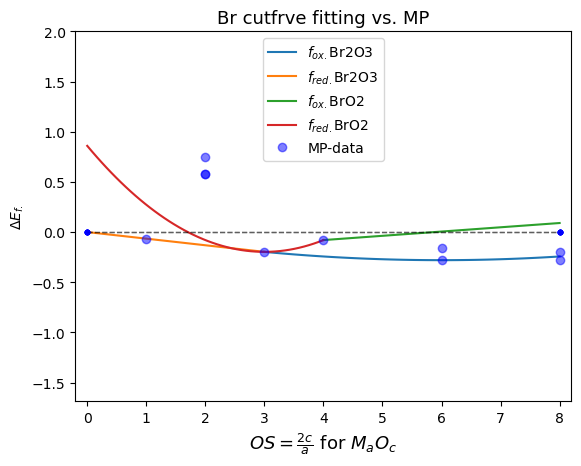

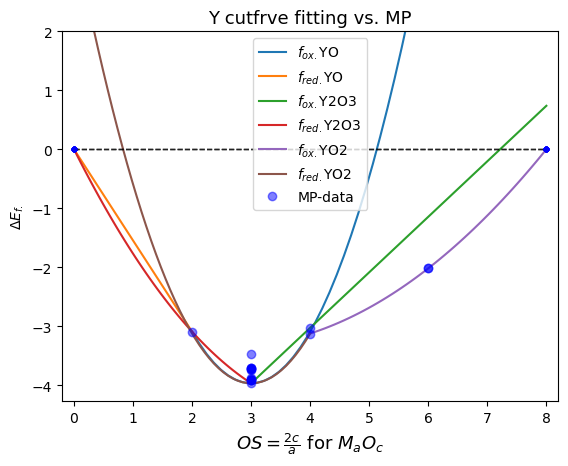

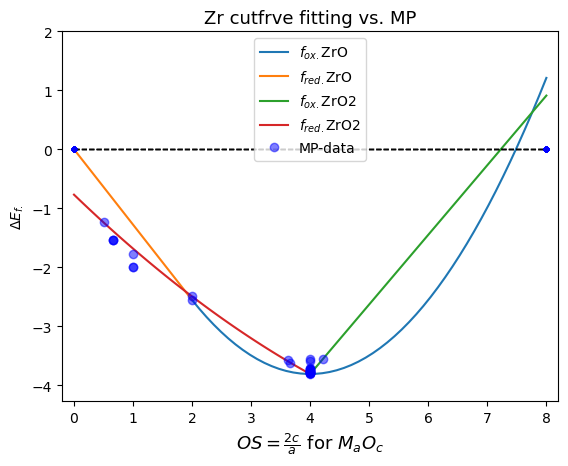

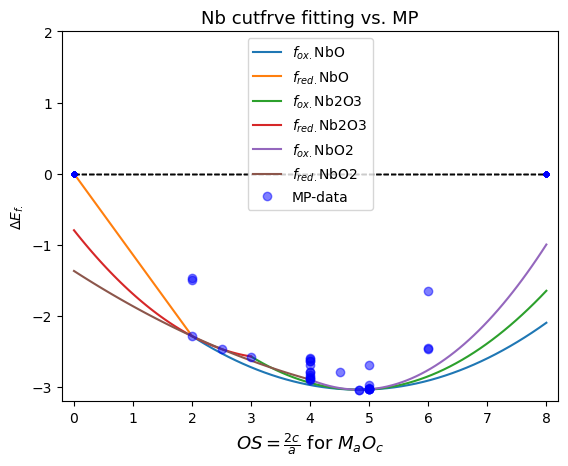

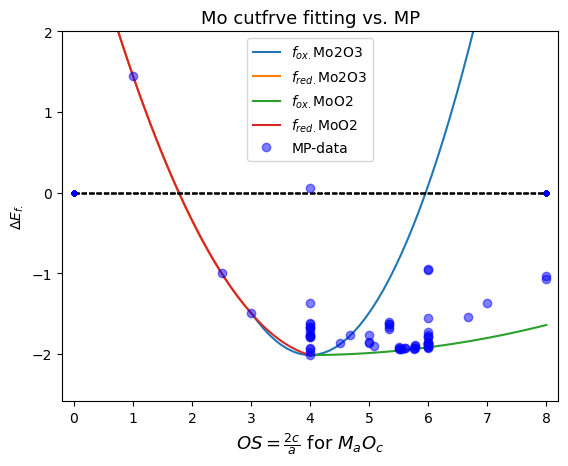

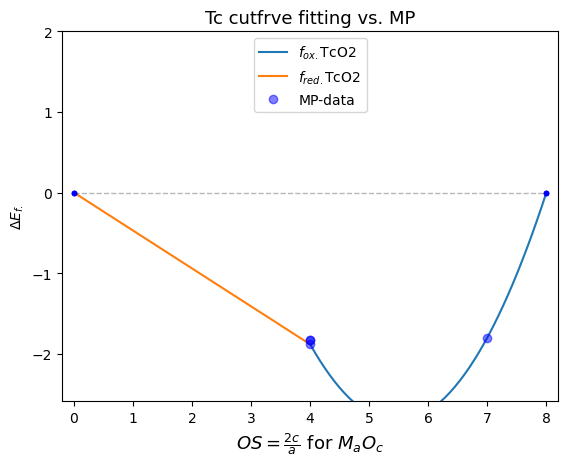

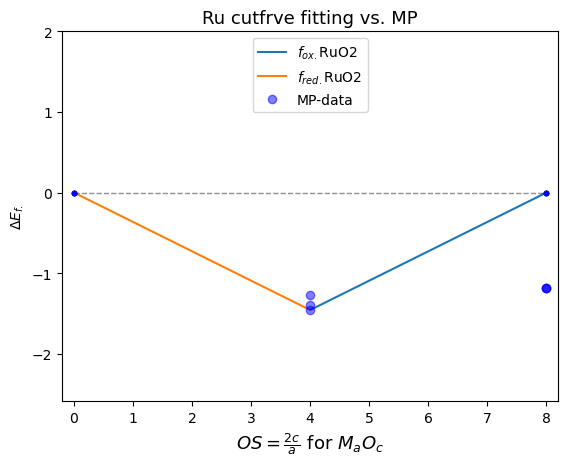

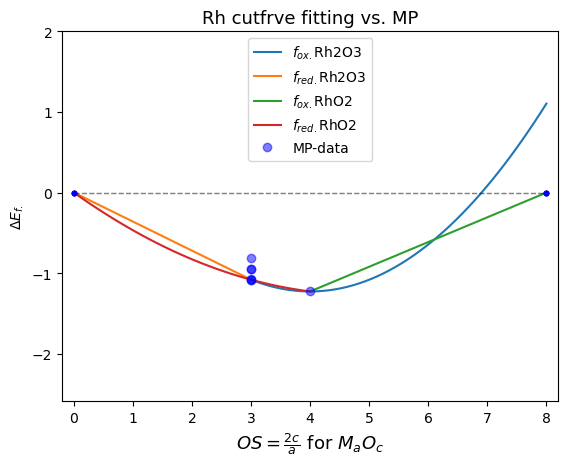

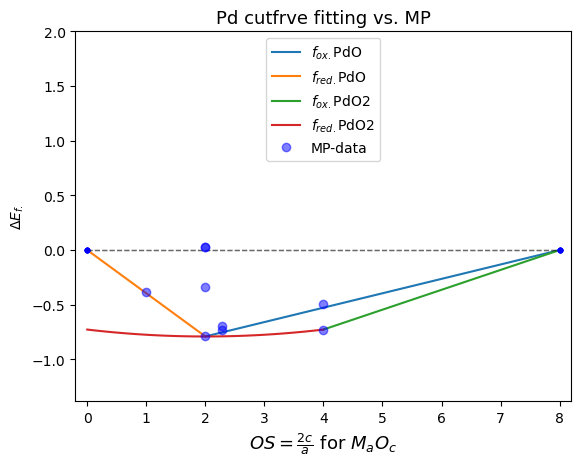

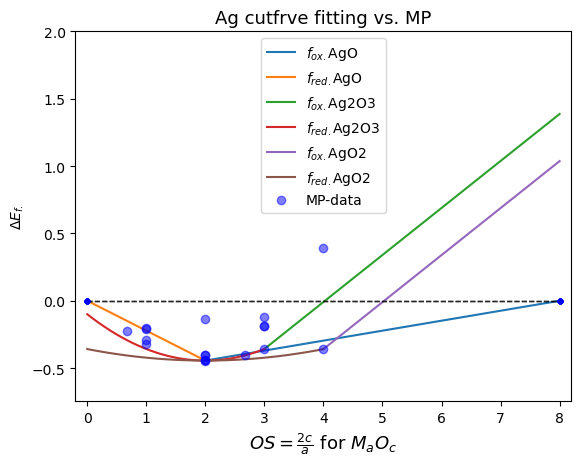

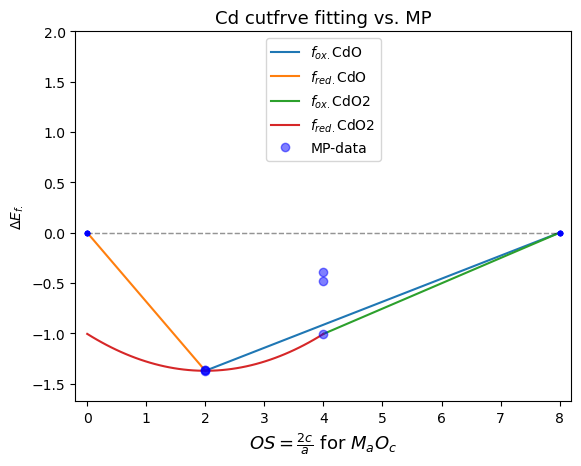

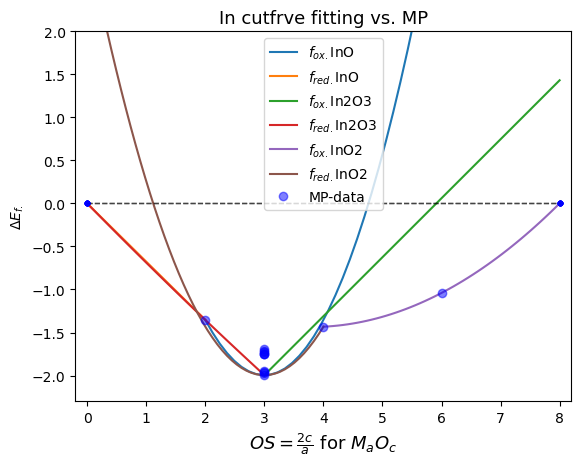

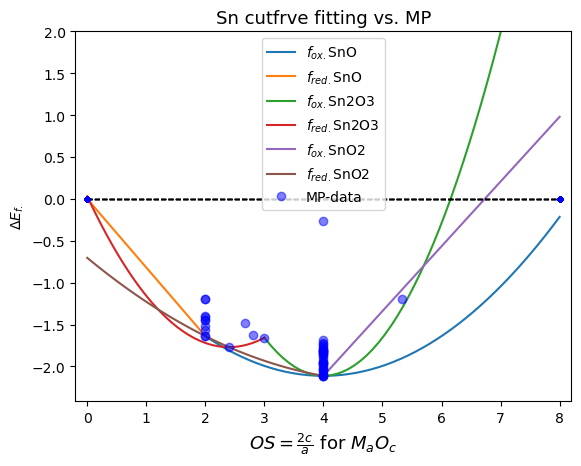

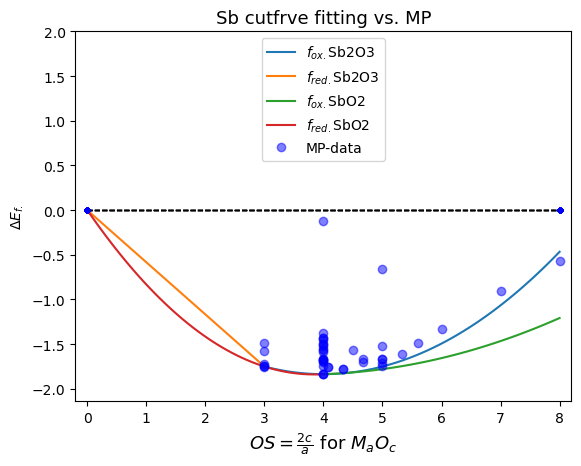

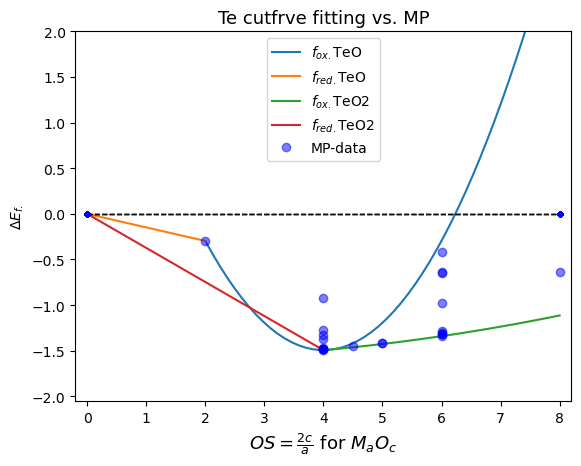

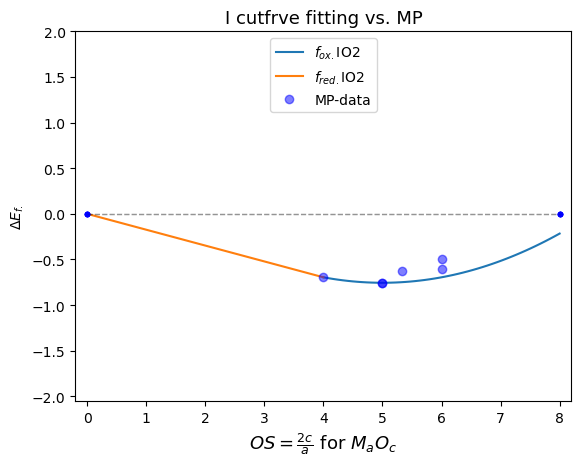

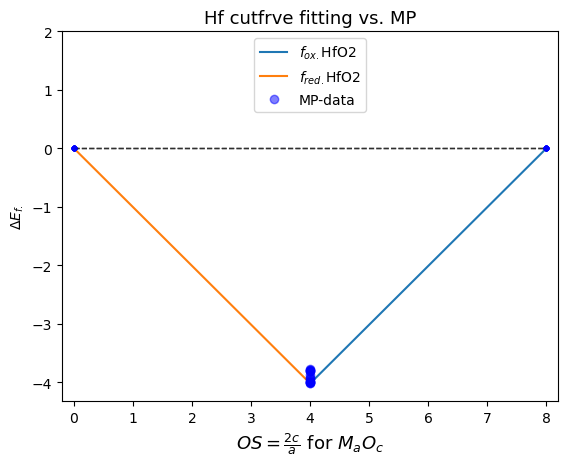

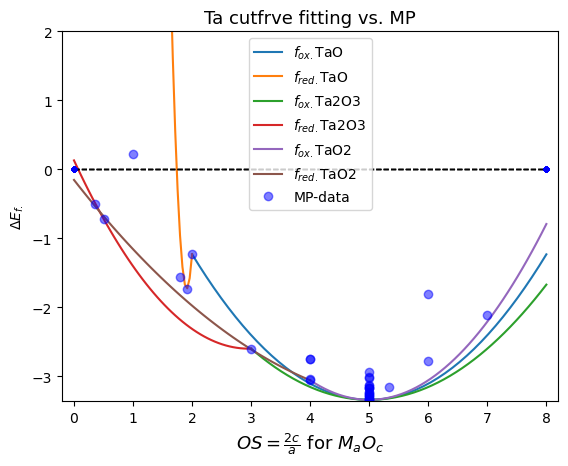

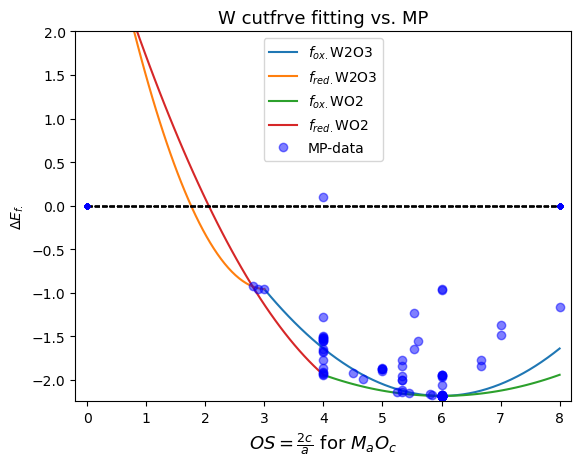

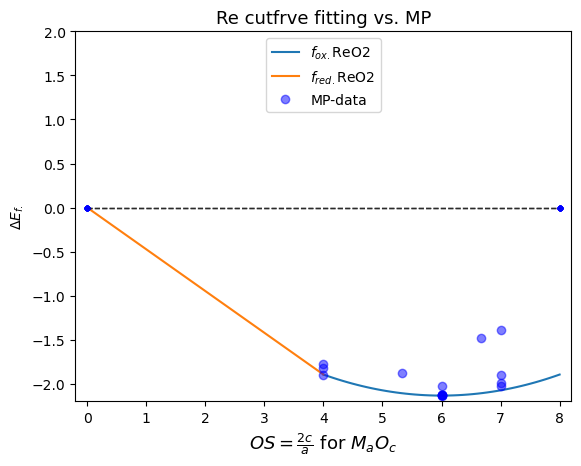

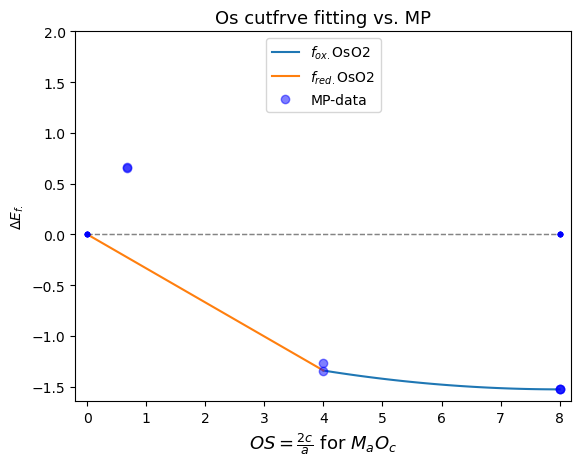

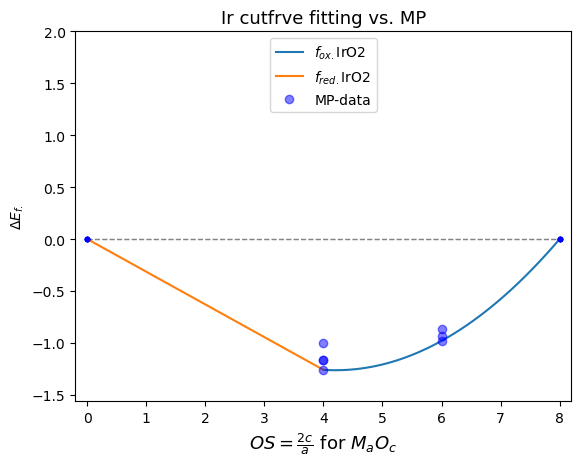

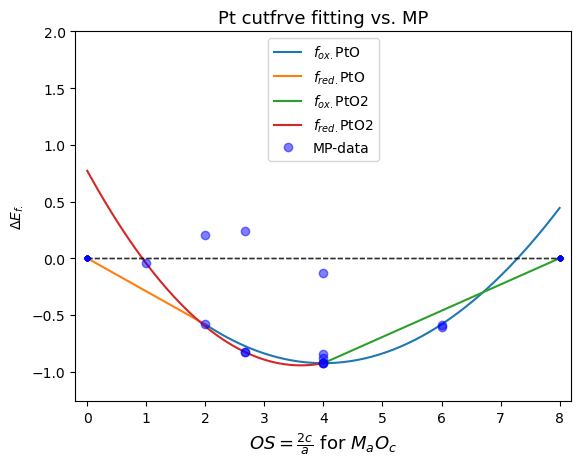

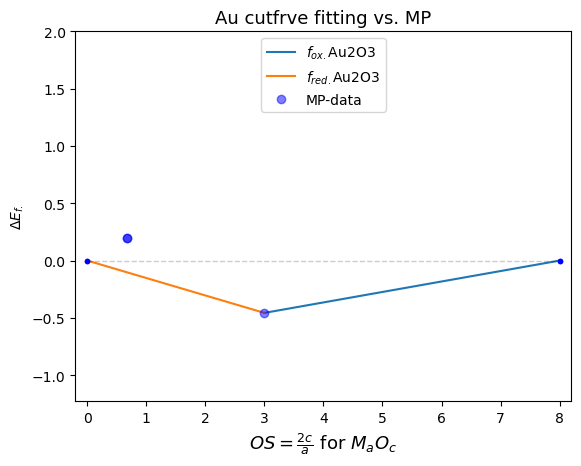

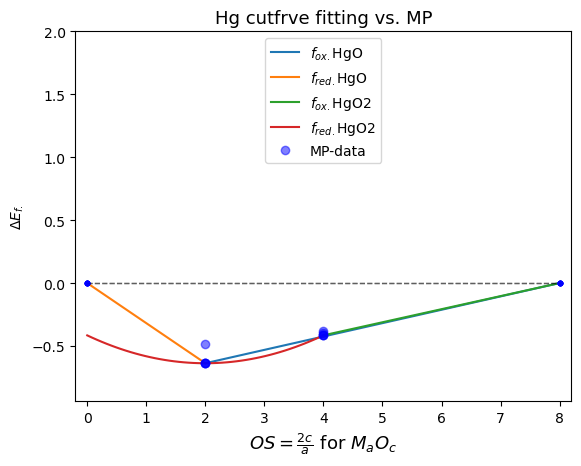

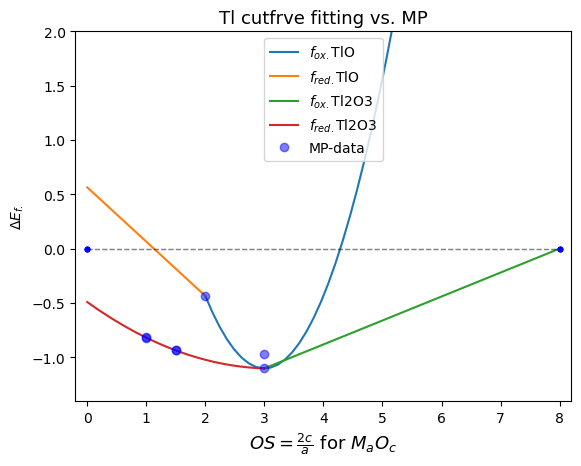

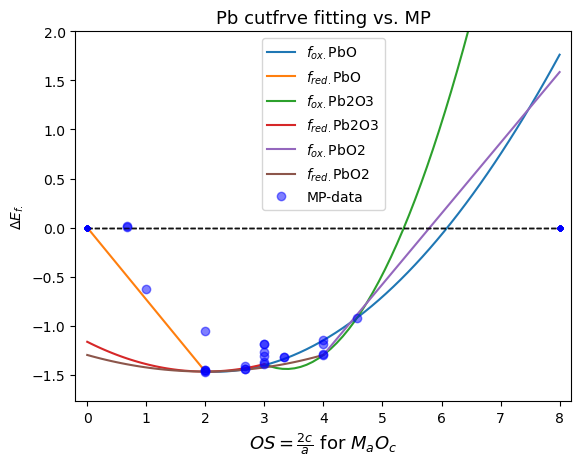

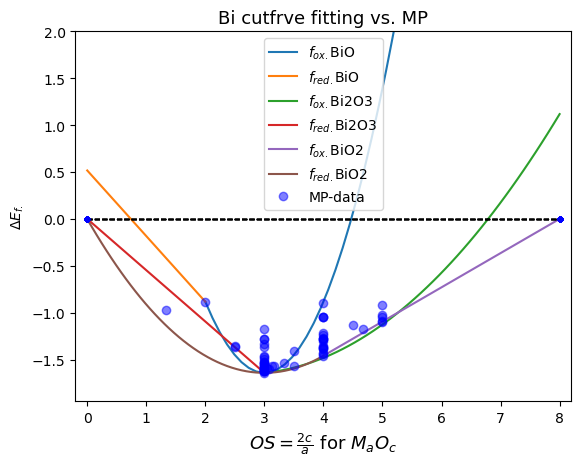

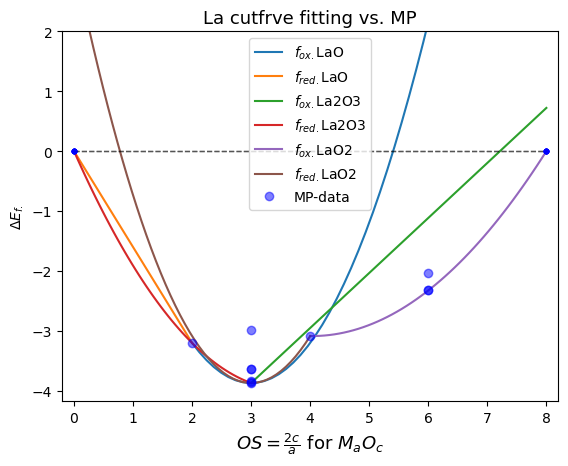

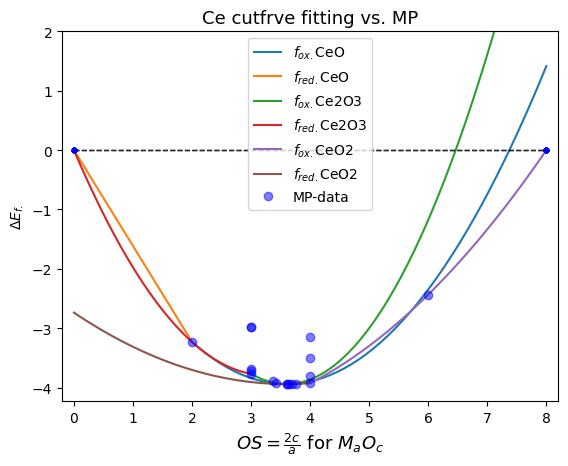

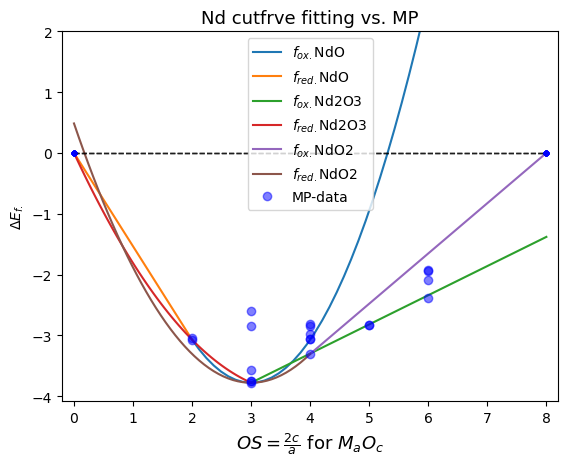

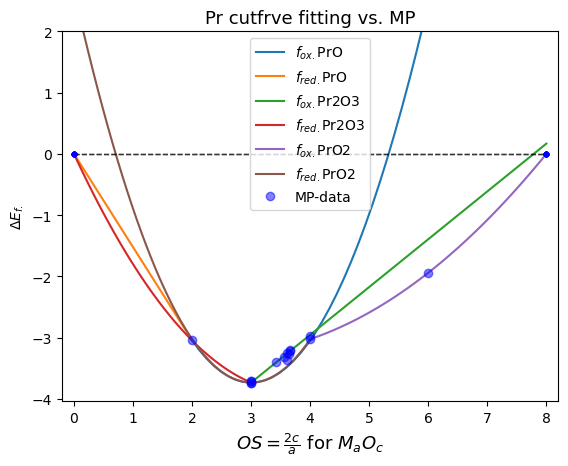

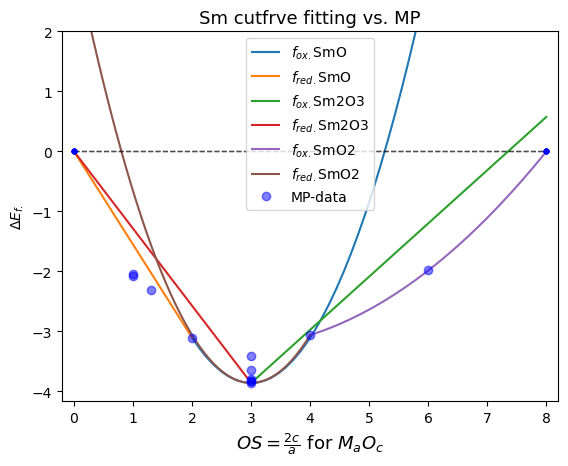

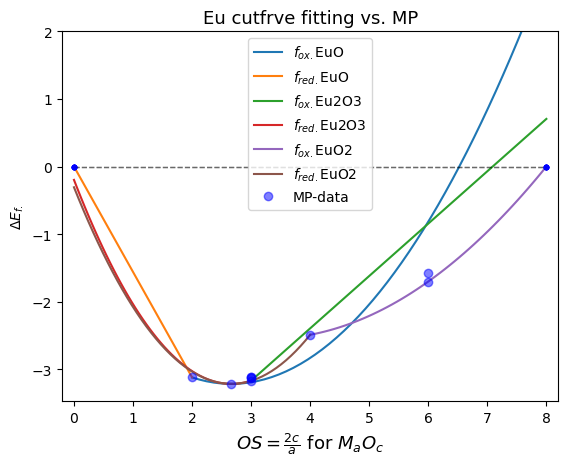

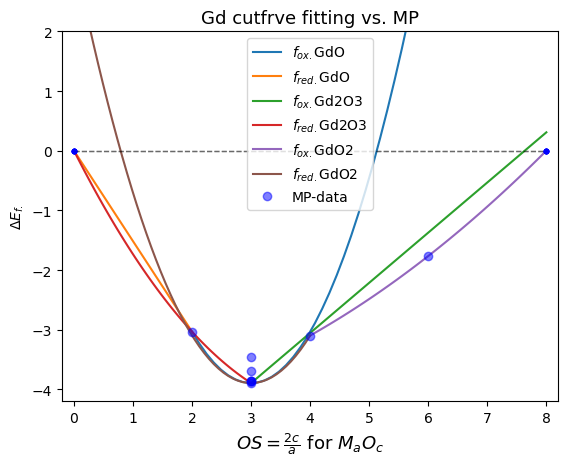

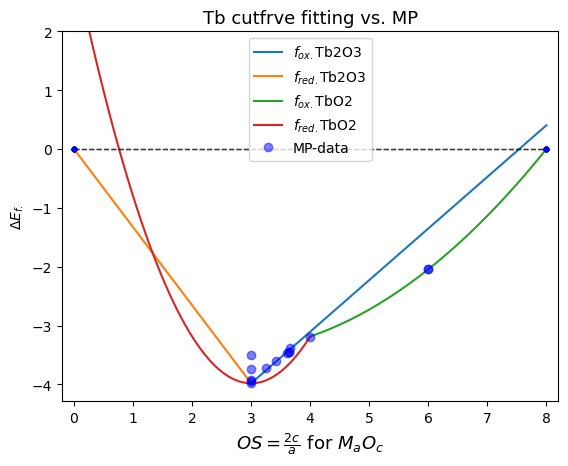

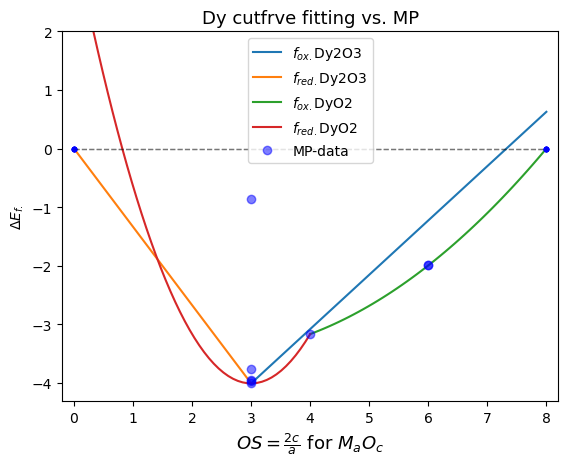

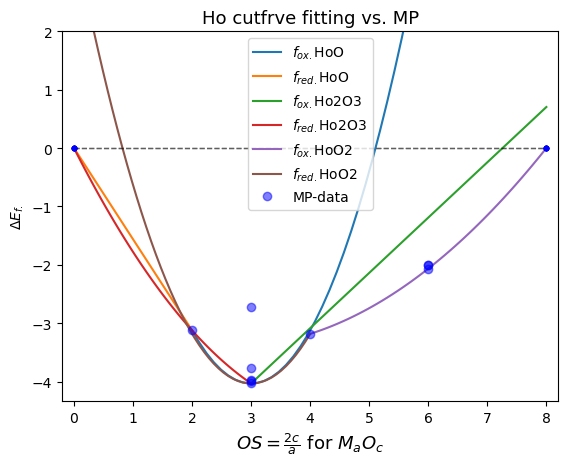

In [ ]:
for ele in elements:
    if ele+"O" in reference_ox2["ele"].values:
        reference_energy_2 = float(reference_ox2.loc[reference_ox2.ele==ele+"O", "ene"])
        plot_curves(2, ele, reference_energy_2)
    if ele+"2O3" in reference_ox3["ele"].values:
        reference_energy_3 = float(reference_ox3.loc[reference_ox3.ele==ele+"2O3", "ene"])
        plot_curves(3, ele, reference_energy_3)
    if ele+"O2" in reference_ox4["ele"].values:
        reference_energy_4 = float(reference_ox4.loc[reference_ox4.ele==ele+"O2", "ene"])
        plot_curves(4, ele, reference_energy_4)
    plot_phase_diag(ele)

    plt.legend(loc="upper center")
    plt.ylim(bottom=min(reference_energy_2, reference_energy_3, reference_energy_4)-0.3,top=2)
    plt.xlim(-0.2, 8.2)
    plt.ylabel("$\Delta E_{f.}$")
    plt.xlabel(r"$OS=\frac{2c}{a}$ for $M_{a}O_{c}$", fontsize=13)
    plt.title(f"{ele} cutfrve fitting vs. MP", fontsize=13)
    #plt.savefig(f"fit_plots/{ele}_fitting_plot.pdf", fontsize=13)
    plt.show()
